Taken from here: https://www.learnpytorch.io/01_pytorch_workflow/

In [50]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Check PyTorch version
torch.__version__

'2.3.0'

In [90]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X.shape, y.shape
# X[:10], y[:10]

(torch.Size([50, 1]), torch.Size([50, 1]))

In [52]:
# Create train/test split
#train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
#X_train, y_train = X[:train_split], y[:train_split]
#X_test, y_test = X[train_split:], y[train_split:]

# own addition, use random train / test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [54]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
      """
      Plots training data, test data and compares predictions.
      """
      plt.figure(figsize=(10, 7))
    
      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
      
      # Plot test data in green
      plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
      if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
      # Show the legend
      plt.legend(prop={"size": 14});

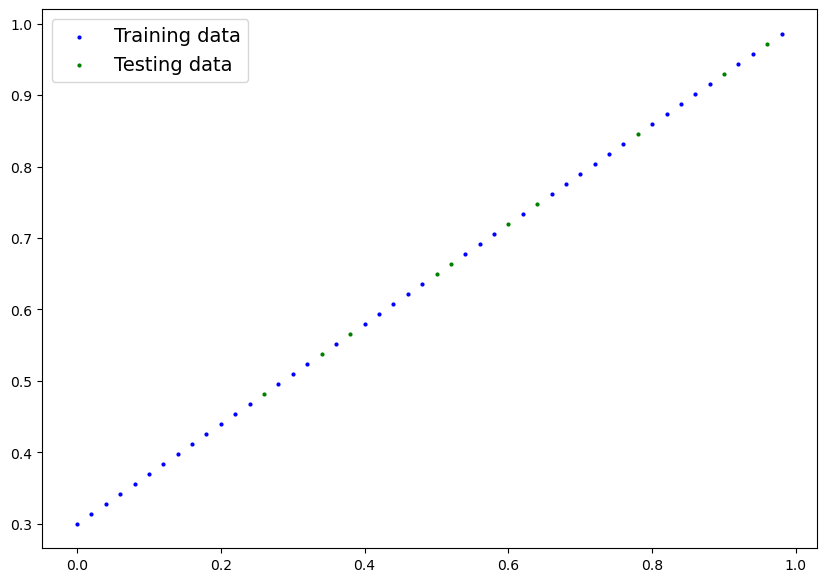

In [56]:
plot_predictions();

In [58]:
linearModel = nn.Linear(1,1)

In [60]:
list(linearModel.parameters())

[Parameter containing:
 tensor([[-0.0552]], requires_grad=True),
 Parameter containing:
 tensor([-0.9729], requires_grad=True)]

In [62]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = linearModel(X_test)

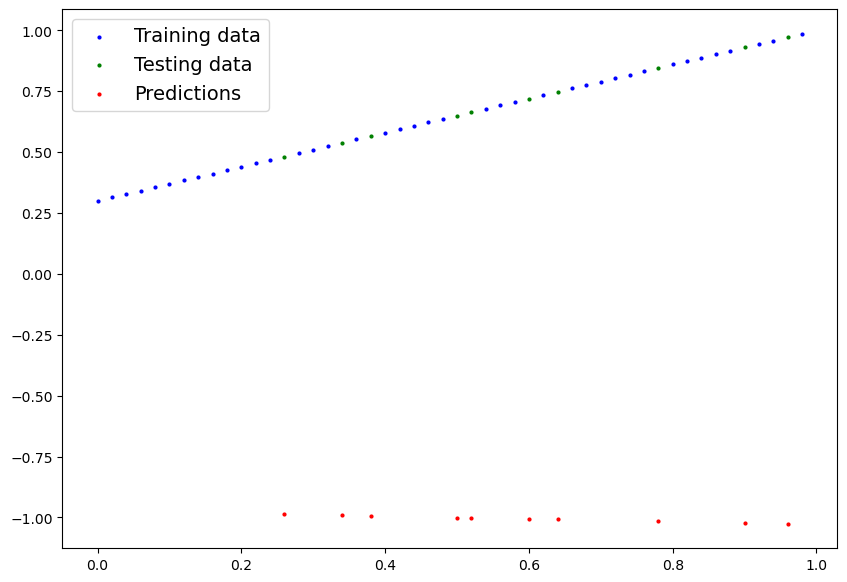

In [64]:
plot_predictions(predictions=y_preds)

In [66]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=linearModel.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [68]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    linearModel.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = linearModel(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    linearModel.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = linearModel(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.6244442462921143 | MAE Test Loss: 1.7042173147201538 
Epoch: 10 | MAE Train Loss: 1.5027753114700317 | MAE Test Loss: 1.5768460035324097 
Epoch: 20 | MAE Train Loss: 1.3811063766479492 | MAE Test Loss: 1.4494746923446655 
Epoch: 30 | MAE Train Loss: 1.2594374418258667 | MAE Test Loss: 1.3221033811569214 
Epoch: 40 | MAE Train Loss: 1.1377685070037842 | MAE Test Loss: 1.1947320699691772 
Epoch: 50 | MAE Train Loss: 1.0160995721817017 | MAE Test Loss: 1.067360758781433 
Epoch: 60 | MAE Train Loss: 0.8944307565689087 | MAE Test Loss: 0.939989447593689 
Epoch: 70 | MAE Train Loss: 0.7727617025375366 | MAE Test Loss: 0.8126181364059448 
Epoch: 80 | MAE Train Loss: 0.6510927081108093 | MAE Test Loss: 0.6852466464042664 
Epoch: 90 | MAE Train Loss: 0.5294235944747925 | MAE Test Loss: 0.5578752160072327 
Epoch: 100 | MAE Train Loss: 0.4077545702457428 | MAE Test Loss: 0.430503785610199 
Epoch: 110 | MAE Train Loss: 0.2860855460166931 | MAE Test Loss: 0.303132414817

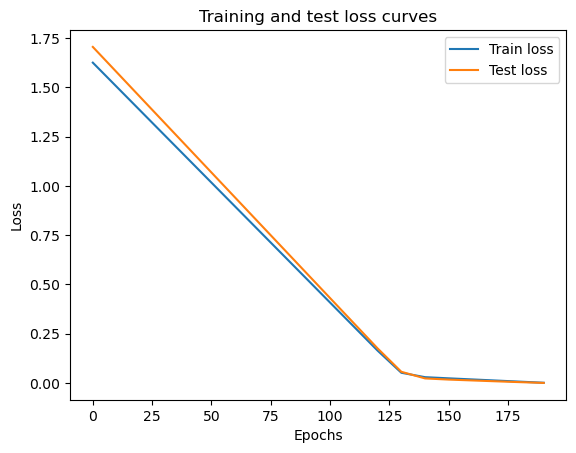

In [70]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [72]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(linearModel.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([[0.6979]]), 'bias': tensor([0.2986])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [74]:
# 1. Set the model in evaluation mode
linearModel.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = linearModel(X_test)
y_preds

tensor([[0.4800],
        [0.8429],
        [0.7173],
        [0.9267],
        [0.5359],
        [0.9686],
        [0.6615],
        [0.6475],
        [0.7452],
        [0.5638]])

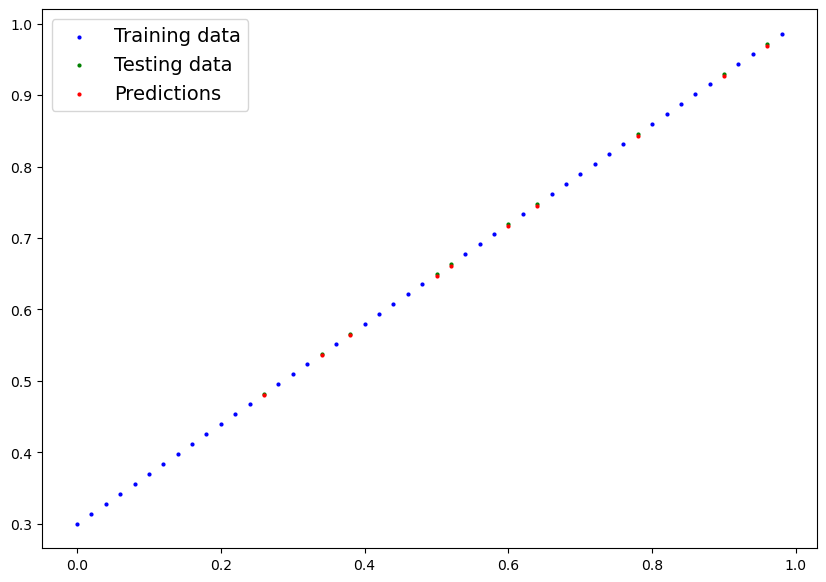

In [76]:
plot_predictions(predictions=y_preds)